<h1 align ="center"> REST API Reference Samples</h1>
<hr>
   
# Get Embeddings
   
Get a vector representation of a given input that can be easily consumed by machine learning models and other algorithms.
In this example, we'll see how to get embeddings using REST API Call.

In [ ]:
import json
import requests
import openai
import os

### Setup Parameters


Here we will load the configurations from _config.json_ file to setup deployment_name, openai_api_base, openai_api_key and openai_api_version.

In [ ]:
# Load config values
with open(r'config.json') as config_file:
    config_details = json.load(config_file)
    
# Setting up the deployment name
deployment_name = config_details['EMBEDDINGS_MODEL']

# The base URL for your Azure OpenAI resource. e.g. "https://<your resource name>.openai.azure.com"
openai_api_base = config_details['OPENAI_API_BASE']

# The API key for your Azure OpenAI resource.
openai_api_key = config_details['OPENAI_API_KEY']

# Currently OPENAI API have the following versions available: 2022-12-01
openai_api_version = config_details['OPENAI_API_VERSION']

print (deployment_name,openai_api_base,openai_api_key)

In [3]:
# Request URL
api_url = f"{openai_api_base}/openai/deployments/{deployment_name}/embeddings?api-version={openai_api_version}"

# Example prompt for request payload
input="The food was delicious and the waiter..."

# Json payload
json_data = {
  "input": input
}

# Setting the API key in the HTTP headers
headers =  {"api-key": openai_api_key}

try:
    # The response will contain embeddings, which you can extract, save, and use.
    response = requests.post(api_url, json=json_data, headers=headers)

    # Getting the JSON object of the result
    embeddings = response.json()
    
    # Print embeddings
    print(embeddings['data'][0]['embedding'][:20])
    
except:
    print("An exception has occurred. \n")
    print("Error Message:", embeddings['error']['message'])

[0.0023481972, -0.009284899, 0.01570119, -0.007710972, -0.0047217803, 0.014863454, -0.009849736, -0.038281962, -0.006930355, -0.028660698, 0.025182828, 0.018112851, -0.0036048, -0.02557631, 0.00049978524, -0.016361222, 0.02827991, 0.0053500817, 0.009652995, -0.016386608]


### Ejercicio 1: Comparar la similitud entre dos frases usando embeddings
# Genera embeddings para dos frases diferentes y calcula la similitud coseno entre ellos.

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

sentence1 = "La comida estuvo increíble y el ambiente fue genial."
sentence2 = "La comida fue deliciosa y el entorno era muy agradable."

json_data1 = {"input": sentence1}
json_data2 = {"input": sentence2}

response1 = requests.post(api_url, json=json_data1, headers=headers)
response2 = requests.post(api_url, json=json_data2, headers=headers)

embedding1 = response1.json()['data'][0]['embedding']
embedding2 = response2.json()['data'][0]['embedding']

similarity = cosine_similarity([embedding1], [embedding2])
print(f"Similitud entres las dos frases: {similarity[0][0]}")


Similitud entres las dos frases: 0.9643170535028146


### Ejercicio 2: Clasificación de texto simple usando embeddings
# Genera embeddings para un conjunto de textos y clasifica si pertenecen a la categoría 'positivo' o 'negativo'.


In [ ]:
texts = ["Mi perro es el mejor", "Los tiburones son peligrosos", "Los gatos son muy buenos", "Mala organizacion"]
labels = ["positive", "negative", "positive", "negative"]
 
embeddings = []
for text in texts: 
    json_data = {"input": text}
    response = requests.post(api_url, json=json_data, headers=headers)
    embedding = response.json()['data'][0]['embedding']
    embeddings.append(embedding)
 
for i, embedding in enumerate(embeddings):
    print(f"Text: {texts[i]} - Label: {labels[i]} - Embedding: {embedding[:5]}")

Text: Mi perro es el mejor - Label: positive - Embedding: [-0.015529949, -0.011669291, -0.008101769, -0.03235718, -0.03125948]
Text: Los tiburones son peligrosos - Label: negative - Embedding: [-0.0077903983, -0.031930707, 0.011474711, -0.008795211, -0.00059350615]
Text: Los gatos son muy buenos - Label: positive - Embedding: [0.0053120684, 0.0037561937, -0.0025332826, -0.034615904, -0.003338839]
Text: Mala organizacion - Label: negative - Embedding: [-0.02474947, -0.011779859, 0.00039467757, -0.020408835, -0.026501413]


### Ejercicio 3: Visualización de embeddings en 2D usando PCA
# Usa PCA para reducir las dimensiones de los embeddings y visualízalos en un gráfico 2D.

In [9]:
pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 49.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 50.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


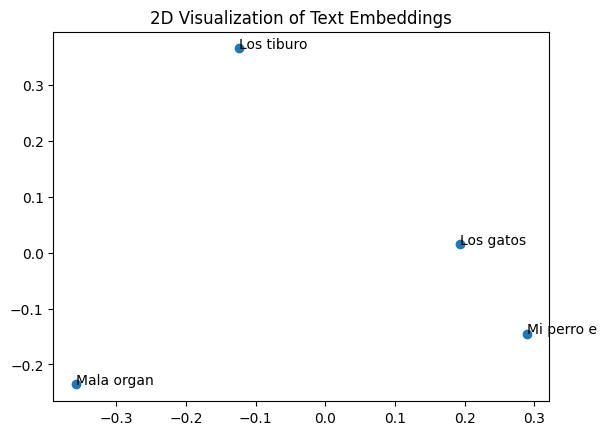

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, text in enumerate(texts):
    plt.annotate(text[:10], (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title("2D Visualization of Text Embeddings")
plt.show()

### Ejercicio 4: Búsqueda de texto similar en una base de datos de embeddings
# Dado un texto de consulta, encuentra el texto más cercano en una lista de documentos almacenados.

In [15]:
query = "Tengo un animal que se llama Marcos"
json_data_query = {"input": query}
response_query = requests.post(api_url, json=json_data_query, headers=headers)
query_embedding = response_query.json()['data'][0]['embedding']

similarities = cosine_similarity([query_embedding], embeddings)
most_similar_index = np.argmax(similarities)

print(f"El texto mas similiar a la sentencia: {texts[most_similar_index]}")

El texto mas similiar a la sentencia: Mi perro es el mejor
